### ipyslides
This notebook will showcase the origins of the library and will be used for testing new features easily.

In [43]:
# !pip3 install pandas
# !pip3 install tabulate
# !pip3 uninstall jupyter-require -y
# !pip3 install ipyparams
# !pip3 install matplotliba

import html_tags
import internal_libs
import numpy as np
import time
import pandas as pd
from urllib.parse import unquote
import codecs
import ipyparams
import json
from matplotlib import pyplot as plt

You will se the following cell to be in the slide because of the comment containing `<!--- ipysl --->`. Class: center,middle will center the text and put it in the middle.

<!-- ipysl alignment center,middle global header "UNCLASSIFIED TEXT" green footer UNCLASSIFIED green --->

Tutorial Slides

In [44]:
df = pd.DataFrame([{"id":1,"name":"michael"},
                   {"id":2,"name":"meaghan"},
                   {"id":3,"name":"jeff"},
                   {"id":4,"name":"michelle"},
                   {"id":5,"name":"shaun"},
                   {"id":6,"name":"gian"},
                   {"id":6,"name":"jose"}])

Since the code does not start with a comment of `# ipysl` it will not take the output to be used in the slide.

In [45]:
print(df.to_markdown(tablefmt="grid"))

+----+------+----------+
|    |   id | name     |
+====+======+==========+
|  0 |    1 | michael  |
+----+------+----------+
|  1 |    2 | meaghan  |
+----+------+----------+
|  2 |    3 | jeff     |
+----+------+----------+
|  3 |    4 | michelle |
+----+------+----------+
|  4 |    5 | shaun    |
+----+------+----------+
|  5 |    6 | gian     |
+----+------+----------+
|  6 |    6 | jose     |
+----+------+----------+


Containing necessary comment for putting into slide. We can probably add more to show also the code if needed.

In [46]:
# ipysl background-color #DEF header "TEXT ME" green footer TEXTME green
print("What an interesting table")
print(df.to_html(index=False).replace("text-align: right;",'').replace("dataframe","table"))

What an interesting table
<table border="1" class="table">
  <thead>
    <tr style="">
      <th>id</th>
      <th>name</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>michael</td>
    </tr>
    <tr>
      <td>2</td>
      <td>meaghan</td>
    </tr>
    <tr>
      <td>3</td>
      <td>jeff</td>
    </tr>
    <tr>
      <td>4</td>
      <td>michelle</td>
    </tr>
    <tr>
      <td>5</td>
      <td>shaun</td>
    </tr>
    <tr>
      <td>6</td>
      <td>gian</td>
    </tr>
    <tr>
      <td>6</td>
      <td>jose</td>
    </tr>
  </tbody>
</table>


We can also put images generated from matplotlib into the slides.

<h1>Nifty looking graph</h1>
asdasd
asdasdasdasdasd


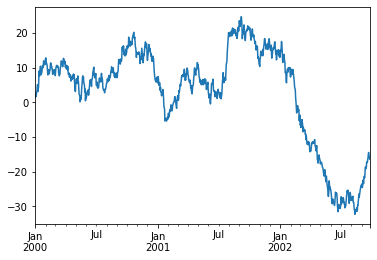

asdasd
asdasdasdasdasd

???
Notes!!! Click P to see the notes



In [35]:
# ipysl code 2 background-image ./bg_img.png
print("<h1>Nifty looking graph</h1>")
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

print("asdasd")
print("asdasdasdasdasd")
plot = ts.plot()
plt.show()
print("asdasd")
print("asdasdasdasdasd")

print("""
???
Notes!!! Click P to see the notes
""")

<!-- ipysl  -->

class: center,middle

Slide End

Keeping this here to prove it wont get put into the slides

<!--- ipysl--> 



<!-- ipysl alignment left-column 2,3,4 alignment right-column 6,10 -->

### Multi Col
Hello from left!

We are staying left until we hit 4 lines (we start at 0)

adasd

Holaaa!!!

rigth here

In [43]:
import base64
import html_tags
import internal_libs
import numpy as np
import time
import pandas as pd
from urllib.parse import unquote
import codecs
import json
from matplotlib import pyplot as plt
import ipykernel.zmqshell as zmq
from IPython.display import display, HTML

def background_image(img_name):  
    with open(img_name, "rb") as img_file:
        b64_str = base64.b64encode(img_file.read())

    return 'background-image: url("data:image/png;base64,'+b64_str.decode('utf-8')+'")'

def background_color(color):
    return 'background-color: '+color
# from IPython.core.display import HTML
# HTML(background_imaage("./bg_img.jpeg"))

def header(commands, idx, continuous="false"):
    temp = {}
    if continuous == "true":
        temp["continuous"] = "layout: true<b/>"
    text = ""
    color = ""
    if '"' in commands[idx+1]:
        text = text+commands[idx+1]
        for idx2,command in enumerate(commands[idx+2:]):
            
            if '"' in command:
                text = text+" "+command
                color = commands[idx2+idx+3]
                break
                
            else:
                text = text+" "+command
                
    else:
        text = commands[idx+1]
        color = commands[idx+2]
        
    text = text.replace('"',"")
    
    temp["other"] = '<div class="my-header", style="background-color:'+("transparent" if color == 'none' else color)+'">'+text+'</div>'
    
    return temp
    
def footer(commands, idx, continuous="false"):
    temp = {}
    if continuous == "true":
        temp["continuous"] = "layout: true<b/>"
        
    text = ""
    color = ""
    if '"' in commands[idx+1]:
        text = text+commands[idx+1]
        for idx2,command in enumerate(commands[idx+2:]):
            
            if '"' in command:
                text = text+" "+command
                color = commands[idx2+idx+3]
                break
                
            else:
                text = text+" "+command
    else:
        text = commands[idx+1]
        color = commands[idx+2]
        
    text = text.replace('"',"")
    
        
    temp["other"] = '<div class="my-footer", style="background-color:'+("transparent" if color == 'none' else color)+'">'+text+'</div>'
    
    return temp

def alignment(commands, scope, return_data):
    commands = commands.split(",")
    
    if scope == "global":
        return_data['class'] = return_data['class']+commands
        
    else:
        if commands[0] in return_data['line'].keys():
            return_data['line'][commands[0]].append(scope)
            
        else:
            return_data['line'][commands[0]] = [int(x) for x in scope.split(",")]
            
    return return_data

# featuares for code blocks
def feature_check_loop(cell, commands, loop_location):
    temp = {"styles":[],"others":[]}
    temp_classes = {'class':[], 'line':{}}
    for idx, val in enumerate(commands):
        if val == "code" and str(loop_location) == commands[idx+1]:
            temp['others'].append("\n```python\n"+"".join(cell["source"][1:])+"\n```\n")
                
    return temp

def feature_alignment_line(line, commands, loop_location, return_data):
    temp_classes = {'class':[], 'line':{}}
    add_line = True
    for idx, val in enumerate(commands):
        if val == "alignment":
            temp_classes = alignment(commands[idx+1], commands[idx+2], temp_classes)
            if len(temp_classes["line"].keys()) > 0 and loop_location in temp_classes["line"][commands[idx+1]]:
                return_data.append([commands[idx+1], line])
                add_line = False
    if add_line:
        return_data.append([line])
    return return_data

def feature_check_end(cell, commands):
    temp =  {"styles":[],"others":[]}
    temp_classes = {'class':[], 'line':{}}
    for idx, val in enumerate(commands):
        if (len(cell['outputs']) == 0 and val == "code" and '0' == commands[idx+1]) or ( val == "code" and len(cell['outputs'])  < int(commands[idx+1])):
            temp['others'].append("\n```python\n"+"".join(cell["source"][1:])+"\n```\n")

        elif val == "background-image":
            temp['styles'].append(background_image(commands[idx+1]))
            
        elif val == "background-color":
            temp['styles'].append(background_color(commands[idx+1]))
            
        elif val == "header":
            temp['others'].append(header(commands, idx)['other'])
            
        elif val == "footer":
            temp['others'].append(footer(commands, idx)['other'])
            
        elif val == "alignment":
            temp_classes = alignment(commands[idx+1], commands[idx+2], temp_classes)
    
    return temp, temp_classes

# feature for markdown blocks
def md_commands(commands):
    temp =  {"styles":[],"others":[]}
    temp_classes = {'class':[], 'line':{}}
    for idx, val in enumerate(commands):
        if val == "background-image":
            temp['styles'].append(background_image(commands[idx+1]))
            
        elif val == "background-color":
            temp['styles'].append(background_color(commands[idx+1]))
            
        elif val == "header":
            temp['others'].append(header(commands, idx)['other'])
            
        elif val == "footer":
            temp['others'].append(footer(commands, idx)['other'])
            
        elif val == "alignment":
            temp_classes = alignment(commands[idx+1], commands[idx+2], temp_classes)
    
    return temp, temp_classes

def create_markdown(file_name):
    # Need to save notebook changes, just making sure in case the
    # user didnt and we dont have the latest file in memory.
    k_magics = zmq.KernelMagics()
    k_magics.autosave(1)

    # Wait two second for file to safe before doing anything else.
    time.sleep(2)
    k_magics.autosave(120)

    # reading file after been saved
    check_file = True
    while check_file:
        try:
            f=codecs.open(unquote(file_name+".ipynb"), 'r')
            file = json.loads(f.read())
            check_file = False
        except Exception as exp:
            print("Error on loading file: " + expe.args[1])
            return expe.args[1]
        
    print("Read File")

    # getting markdowns/code cells outputs.
    markdown = []
    for cell in file['cells']:
        # Checking to see if cell is markdown already
        if cell['cell_type'] == 'markdown' and  len(cell['source']) > 0:
            # Does it have the library command
            if "<!-- ipysl" in cell['source'][0] or "<!--ipysl" in cell['source'][0]:
                temp,temp_classes = md_commands(cell['source'][0].split(" "))
                temp_return = []
                for idx,row in enumerate(cell['source'][1:]):
                    temp_return = feature_alignment_line(row, cell['source'][0].split(" "), idx, temp_return)

                if len(temp_return) > 0:
                    data = []
                    t_alignment = {}
                    for row in temp_return:
                        if len(row) == 1:
                            for align in t_alignment.keys():
                                data.append("."+align+"["+"".join(t_alignment[align])+"]\n")
                            t_alignment = {}
                            data.append(row[0]+"\n")

                        else:
                            if row[0] in t_alignment:
                                t_alignment[row[0]].append(row[1])
                            else:
                                t_alignment[row[0]] = [row[1]]
                    if len(t_alignment) > 0:
                        for align in t_alignment.keys():
                            data.append("."+align+"["+"\n".join(t_alignment[align])+"]\n")
                        t_alignment = {}

                else:
                    data = ["\n".join(cell['source'][1:])]

                data.append("\n".join(temp["others"]))
                for feat in temp['styles']:
                    data.insert(0,feat+"\n")

                if len(temp_classes['class']) > 0:
                    data.insert(0,"class: "+",".join(temp_classes['class'])+"\n\n")
                markdown.append("".join(data))

        elif cell['cell_type'] == 'code':
            if len(cell['source']) > 0 and "#" in cell['source'][0] and "ipysl" in cell['source'][0]:
                # splitting the command to get what we want.
                commands = cell['source'][0].split("ipysl")[1].strip().replace('\n','').split(" ")
                temp = []
                temp_return = []
                row = 0
                for idx, output in enumerate(cell['outputs']):
                    if "text" in output:
                        for r in output["text"]:
                            feature_vals = feature_check_loop(cell, commands, row)
                            
                            temp_return = feature_alignment_line("\n".join(feature_vals['others']), commands, idx, temp_return)

                            temp_return = feature_alignment_line(r, commands, row, temp_return)

                            temp.append("\n".join(feature_vals['others']))

                            row = row+1

                    elif "data" in output:
                        feature_vals = feature_check_loop(cell, commands, row)

                        temp_return = feature_alignment_line("\n".join(feature_vals['others']), commands, row, temp_return)

                        temp.append("\n".join(feature_vals['others']))
                        if "image/png" in output["data"]:
                            image = '<img src="data:image/png;base64,'+output["data"]['image/png']+'">'
                            temp_return = feature_alignment_line(image, commands, row, temp_return)
                            temp.append(image)
                        row = row+1
                
                if len(temp_return) > 0:
                    temp = []
                    t_alignment = {}
                    for row in temp_return:
                        if len(row) == 1:
                            for align in t_alignment.keys():
                                temp.append("."+align+"["+"\n".join(t_alignment[align])+"]\n")
                            t_alignment = {}
                            temp.append(row[0]+"\n")

                        else:
                            if row[0] in t_alignment:
                                t_alignment[row[0]].append(row[1])
                            else:
                                t_alignment[row[0]] = [row[1]]
                    if len(t_alignment) > 0:
                        for align in t_alignment.keys():
                            temp.append("."+align+"["+"\n".join(t_alignment[align])+"]\n")
                        t_alignment = {}

                feature_vals,temp_classes = feature_check_end(cell, commands)
                temp.append("\n".join(feature_vals["others"]))
                for feat in feature_vals['styles']:
                    temp.insert(0,feat+"\n\n")

                if len(temp_classes['class']) > 0:
                    temp.insert(0,"class: "+",".join(temp_classes['class'])+"\n\n")

                markdown.append("".join(temp))
    return markdown

def generate_html_doc(filename, js_css="internal", css=[], javascript=[], remark_js=[]):
    """
        This function will generate the HTML code that will be stored into the index.html
        file. The function allows the user to select between a mix match of ways to get 
        the jascript and css files.
        
        Params:
            js_css - Tell the function which way to get the CSS/Javascript files. The main options are internal, external or personal. internal(or offline) uses the libraries provided in the package. external uses provided urls in the package for the libraries. external will use urls passed in the other parameters of this function. You can mix them using the an underscore between them. Ex. external_personal. 
            css - List containing urls to external CSS files.
            javascript - List containing urls to external JS files
    """
    markdown = create_markdown(filename)
    if markdown == "No such file or directory":
        return "error"
    markdowns = "\n---\n".join(list(filter(None, markdown)))+"\n"
    textarea = '<textarea id="source">'+markdowns+'</textarea>'
    
    # Which libraries to use.
    temp = []
    temp_remark_js = []
    if "internal" in js_css:
        temp.append("<script>"+internal_libs.bootstrap_popper+"</script>")
        temp.append("<script>"+internal_libs.bootstrap_javascript+"</script>")
        temp.append("<script>"+internal_libs.bootstrap_jquery+"</script>")
        temp.append("<style>"+internal_libs.bootstrap_css+"</style>")
        temp_remark_js.append("<script type='text/javascript'>"+internal_libs.remark_js+"</script>")
        
    if "external" in js_css:
        for url in internal_libs.bootstrap_urls_css:
            temp.append('<link href="'+url+'" rel="stylesheet">')
            
        for url in internal_libs.bootstrap_urls_js:
            temp.append('<script src="'+url+'"></script>')
        
        for url in internal_libs.remark_urls_js:
            temp_remark_js.append('<script src="'+url+'"></script>')
    
    if "personal" in js_css:
        for url in css:
            temp.append('<link href="'+url+'" rel="stylesheet">')
            
        for url in javascript:
            temp.append('<script src="'+url+'"></script>')
            
        if len(remark_js) > 0:
            temp_remark_js = []
            
            for url in internal_libs.remark_urls_js:
                temp_remark_js.append('<script src="'+url+'"></script>')
            
    html_tags.import_libs = "\n".join(temp)
    html_tags.scripts = "\n".join(temp_remark_js)
        
    html_doc = (html_tags.head_top +
        html_tags.import_libs +
        html_tags.style +
        html_tags.head_bottom +
        html_tags.body_top + 
        textarea +
        html_tags.scripts + 
        html_tags.body_bottom
    )
    
    return html_doc

def create_file(notebook_name, file_name="index.html", js_css="internal", css=[], javascript=[], remark_js=[]):
    html_doc = generate_html_doc(notebook_name, js_css, css, javascript, remark_js)
    
    if html_doc == "error":
        return "Error"
    
    text_file = open(file_name, "w")
    text_file.write(html_doc)
    text_file.close()

    display(HTML('<a href="./'+file_name+'" target="_blank">Go see your slides</a>'))
    

In [ ]:
html_doc = create_file("Library_Parsing_Example", js_css = "external")

Autosaving every 1 seconds


Generating the textarea for the library to pull the info from.

Code End